In [1]:
%pylab inline
from astropy.io import fits
from astropy.table import Table
from simqso.sqrun import load_spectra
import bossqsos

Populating the interactive namespace from numpy and matplotlib


### Input luminosity function

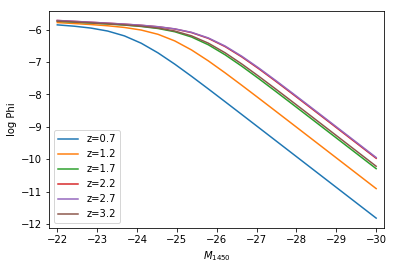

In [2]:
M1450 = linspace(-30,-22,20)
zz = arange(0.7,3.5,0.5)
ple = bossqsos.BOSS_DR9_PLE()
lede = bossqsos.BOSS_DR9_LEDE()
for z in zz:
    if z<2.2:
        qlf = ple if z<2.2 else lede
    plot(M1450,qlf(M1450,z),label='z=%.1f'%z)
legend(loc='lower left')
xlim(-21.8,-30.2)
xlabel("$M_{1450}$")
ylabel("log Phi")

### Run the simulation, save the spectra

In [3]:
bossqsos.qsoSimulation(bossqsos.simParams,writeFeatures=True,saveSpectra=True)

boss_dr9qlf_sim output not found
generating Mz grid
integration returned  390  objects
39  out of  390
78  out of  390
117  out of  390
156  out of  390
195  out of  390
234  out of  390
273  out of  390
312  out of  390
351  out of  390
390  out of  390


loading forest  boss_dr9qlf_forest
... not found, generating forest
finished LOS #20
finished LOS #40
finished LOS #80
finished LOS #120
finished LOS #160
finished LOS #180
done!
... building continuum grid
using Fe scales:  [(0, 1540, 0.5), (1540, 1680, 2.0), (1680, 1868, 1.6), (1868, 2140, 1.0), (2140, 3500, 1.0)]
units are  flux
fluxBand is  2 ['SDSS-Legacy-u', 'SDSS-Legacy-g', 'SDSS-Legacy-r', 'SDSS-Legacy-i', 'SDSS-Legacy-z', 'UKIRT-UKIDSS_LAS-Y', 'UKIRT-UKIDSS_LAS-J', 'UKIRT-UKIDSS_LAS-H', 'UKIRT-UKIDSS_LAS-K']
buildQSOspectra iteration  1  out of  3
--> delta mag mean = -0.2136860, rms = 0.0941675, |max| = 0.4834535
buildQSOspectra iteration  2  out of  3
--> delta mag mean = -0.0042675, rms = 0.0048743, |max| = 0.0259651
buildQSOspectra iteration  3  out of  3
--> delta mag mean = -0.0001419, rms = 0.0002321, |max| = 0.0014753
mapping photometry
               stage     time  elapsed     frac
     Initialize Grid    1.840    1.840    0.066
     Generate Forest   23.595   25.435

load the simulation outputs:

In [4]:
wave,qsos = load_spectra('boss_dr9qlf_sim','.')
qsodata = Table(fits.getdata('boss_dr9qlf_sim.fits',2))

the table of simulated quasars, including redshift, luminosity, synthetic flux/mags in nine bands, and "observed" photometry with errors included:

In [5]:
qsos.show_in_notebook()

idx,appMag,z,M,synFlux [9],synMag [9],obsFlux [9],obsMagErr [9],obsMag [9],obsFluxErr [9],spec [2304]
0,21.5108371004,2.312383756,-23.1505705995,1.24244613369 .. 6.3319683401,22.2643060776 .. 20.4961531632,1.23165782989 .. 6.88579046954,0.167217948436 .. 0.246655988196,22.0036156165 .. 20.4051154919,0.296555964719 .. 1.56435613224,1.02018476386e-17 .. 1.1276487302e-19
1,20.2061773326,2.72561859737,-24.826069931,3.44940955769 .. 6.69421196157,21.155638094 .. 20.4357513513,3.92358097615 .. 6.34450124466,0.0645867918485 .. 0.215276282544,20.9783845729 .. 20.4940062827,0.249461583228 .. 1.25800924984,4.80972965789e-19 .. 1.56886157463e-19
2,21.349144812,2.00006762836,-22.8615216767,2.20970686166 .. 9.41446880318,21.6391633393 .. 20.0655104484,1.86877403321 .. 9.59157297927,0.10901566945 .. 0.18106583649,21.6802108562 .. 20.0452754111,0.239363032968 .. 1.59961884936,1.35982157939e-17 .. 1.5777069391e-19
3,21.8067873236,2.2088439638,-22.7941729281,1.3395100217 .. 4.37367659782,22.182635082 .. 20.8978833327,1.6683732241 .. 1.2864388318,0.123703639795 .. 1.04906315153,21.7745798161 .. 22.2265271475,0.254108867838 .. 1.24302806957,7.17402243546e-18 .. 6.81674899009e-20
4,20.7435982399,2.09225820773,-23.9051544317,5.01389527616 .. 6.11308122148,20.7495618532 .. 20.5343495848,4.76225215041 .. 9.58693379622,0.0780804371998 .. 0.216999268946,20.7794618786 .. 20.0458006792,0.358645552891 .. 1.91614407775,3.49999225297e-17 .. 7.31067390129e-20
5,19.9803707707,2.05634403007,-24.4922375236,8.75595029074 .. 19.8511585872,20.1442417817 .. 19.2555353528,8.65062089673 .. 19.2685476602,0.0319859085525 .. 0.0852522036472,20.1488507266 .. 19.2878775461,0.258559725585 .. 1.51302030866,6.27148566127e-17 .. 4.2243840036e-19
6,21.1983190701,2.1196928497,-23.3190211055,2.38073178727 .. 7.44229952542,21.5582238234 .. 20.320732138,2.13380940176 .. 5.8357315754,0.104386795775 .. 0.306815366363,21.5645555359 .. 20.5847617311,0.249677714643 .. 1.64915917961,1.80514425887e-17 .. 2.799265079e-19
7,20.343290301,2.24575208922,-24.2098301212,3.91899647862 .. 22.3178832975,21.0170628169 .. 19.1283674943,3.64416144506 .. 22.5247226435,0.07986767108 .. 0.082035629709,21.0530733632 .. 19.1183513699,0.289341499652 .. 1.70197089995,3.24172221203e-17 .. 1.86433097238e-19
8,20.9443568551,2.29274145835,-23.675733105,2.13113888486 .. 12.3005388119,21.6784706167 .. 19.7751896608,1.79207756705 .. 13.2988966234,0.119648885363 .. 0.107113779572,21.7155871469 .. 19.6904609747,0.256137860754 .. 1.3120522073,1.73262951859e-17 .. 1.53580500856e-19
9,20.8875394353,2.44635455387,-23.9167897733,2.31718491813 .. 8.2679983894,21.5875982671 .. 20.2064990416,2.38872863909 .. 7.74780812541,0.127774276329 .. 0.272998093235,21.4621043626 .. 20.2770528578,0.330711148915 .. 1.94817799115,3.34097052383e-18 .. 7.83405108306e-20


details of the model inputs for each quasar: `slopes` is the set of broken power law slopes defining the continuum, `lineWave` is the rest wavelength of each emission line (includes shifts), `lineWidth` is the FWHM in angstroms, and `lineEW` is the rest equivalent width:

the distribution in g-band magnitude:

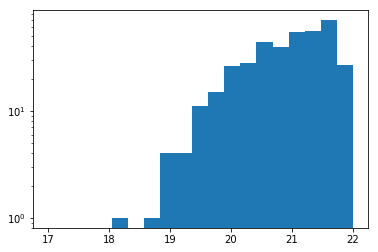

In [6]:
_ = hist(qsos['obsMag'][:,1],linspace(17,22,20),log=True)

color-color diagram from __observed__ magnitudes, including errors:

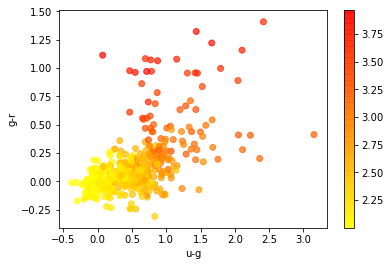

In [7]:
scatter(qsos['obsMag'][:,0]-qsos['obsMag'][:,1],qsos['obsMag'][:,1]-qsos['obsMag'][:,2],
        c=qsos['z'],cmap=cm.autumn_r,alpha=0.7)
colorbar()
xlabel('u-g')
ylabel('g-r')

In [8]:
qsodata.show_in_notebook()

idx,slopes [5],lineWave [62],lineWidth [62],lineEW [62]
0,-1.0126963909 .. -0.770377711203,1034.64 .. 20506.8,6.81653 .. 324.889,8.63216 .. 7.29744
1,-2.19046160906 .. -1.10481111264,1033.5 .. 20506.8,5.85755 .. 264.555,11.8238 .. 10.5414
2,-1.06136761889 .. -0.689869167299,1033.75 .. 20506.8,6.264 .. 288.326,10.5159 .. 8.14198
3,-1.82996738019 .. -0.855155435885,1033.53 .. 20506.8,6.72647 .. 318.503,12.1693 .. 9.08613
4,-1.83018575316 .. -0.759743215221,1034.22 .. 20506.8,7.10653 .. 345.733,8.49997 .. 7.64547
5,-1.70511835775 .. -0.870893359979,1032.83 .. 20506.8,5.43497 .. 240.331,10.6256 .. 9.42377
6,-1.70749822552 .. -1.23137383925,1034.67 .. 20506.8,6.01765 .. 273.864,7.83733 .. 6.93171
7,-1.50379937968 .. -0.807386751827,1033.5 .. 20506.8,6.49382 .. 302.202,11.1256 .. 9.56157
8,-1.55755066571 .. -1.01475767357,1034.02 .. 20506.8,6.13222 .. 280.569,10.3548 .. 8.56505
9,-1.69109869397 .. -0.844839067088,1033.75 .. 20506.8,6.91387 .. 331.838,13.4158 .. 10.9655


the list of emission lines in the model:

In [9]:
qsodatahdr = fits.getheader('boss_dr9qlf_sim.fits',2)
for i,n in enumerate(qsodatahdr['LINENAME'].split(',')):
    print '%d:%s, '% (i,n,),
print

0:LyB,  1:ArI,  2:FeIII:UV1,  3:CIII*,  4:LyAn,  5:LyAb,  6:NV,  7:SiII,  8:OI,  9:CII,  10:SiIV+OIV],  11:L1480,  12:CIVn,  13:CIVb,  14:HeII,  15:OIII],  16:L1690,  17:NIII],  18:SiII_1818,  19:AlIII,  20:SiIII],  21:CIII]b,  22:CIII]n,  23:fe2120,  24:fe2220,  25:MgIIb,  26:MgIIn,  27:OIII_3133,  28:[NeV]3346,  29:[NeV]3426,  30:[OII]3728,  31:[NeIII]3869,  32:HeI3889,  33:[NeIII]3968,  34:Hd,  35:Hg,  36:[OIII]4364,  37:Hbeta,  38:[OIII]4960,  39:[OIII]5008,  40:HeI_5877,  41:[OI]6302,  42:[OI]6365,  43:[NII]6549,  44:[NII]6585,  45:HAb,  46:HAn,  47:[SII]6718,  48:[SII]6732,  49:HeI7067,  50:[OII]7321,  51:OI8446,  52:[SIII]9069,  53:FeII9202,  54:Pae,  55:Pad,  56:HeI10830,  57:Pag,  58:OI11287,  59:Pabeta,  60:Paalpha,  61:HeI20580, 


broad CIV equivalent width, displaying the Baldwin Effect:

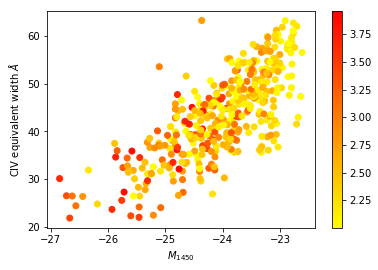

In [10]:
scatter(qsos['M'],qsodata['lineEW'][:,13],c=qsos['z'],cmap=cm.autumn_r)
colorbar()
xlabel("$M_{1450}$")
ylabel("CIV equivalent width $\AA$")

example spectrum (doesn't actually include warm dust emission at a few microns):

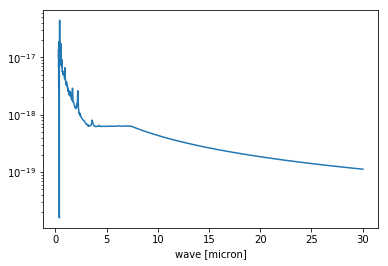

In [14]:
plot(wave/1e4,qsos['spec'][0])
yscale('log')
xlabel('wave [micron]')

(3500, 7500)

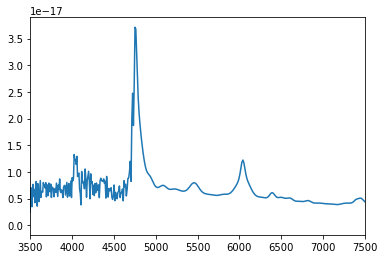

In [15]:
plot(wave,qsos['spec'][20])
xlim(3500,7500)